In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns',300)

In [3]:
df = pd.read_csv('/home/manav/2-Day-DataScience-Workshop/RegressionProblems/datasets/winequality-red.csv',sep=';')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
sns.set(font='1.5')

In [5]:
cor_w = df.corr()

In [6]:
cor_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [17]:
sns.heatmap(cor_w,square=True,cmap="YlGnBu")

/home/manav/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['1.5'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


/home/manav/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['1.5'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


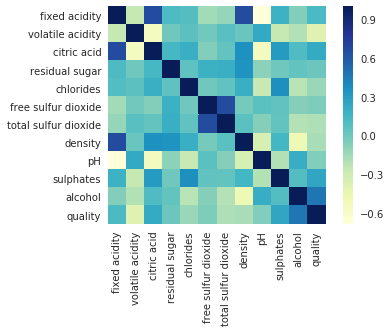

In [18]:
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/home/manav/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X = df[list(df.columns)[:-1]]
y= df['quality']

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [9]:
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [11]:
regressor = LinearRegression()

In [12]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
predicted = regressor.predict(X_test)

In [14]:
print('the value of r-squared score:',regressor.score(X_test,y_test))

the value of r-squared score: 0.255204392004


In [15]:
predicted

array([ 5.80599544,  5.30702314,  5.57920555,  5.44041408,  5.00791334,
        5.1372934 ,  5.17050609,  5.73364759,  6.20488063,  6.0757128 ,
        5.12635071,  5.78301442,  5.13023842,  5.78266806,  5.40774406,
        5.5440544 ,  5.32183309,  5.18320758,  5.2969449 ,  5.4313051 ,
        5.70662276,  5.39450481,  5.35037908,  6.14945029,  5.02279517,
        5.2606304 ,  5.0333297 ,  5.76780732,  5.60457907,  5.1601506 ,
        5.10255705,  5.13067412,  5.48428524,  5.19874046,  5.14583077,
        5.08152154,  6.50586398,  5.41724486,  6.51604945,  4.97270866,
        5.86588672,  6.14806714,  5.02448746,  5.32699184,  5.04120144,
        5.85305815,  6.01729074,  5.02956772,  5.42043641,  5.5242143 ,
        5.772022  ,  6.50394567,  5.43818684,  6.14914918,  5.47166798,
        5.04386451,  6.02808469,  6.71949129,  6.23839211,  6.03902042,
        5.59147346,  6.16208622,  5.89376163,  6.89084628,  5.47231595,
        5.41775005,  6.12047013,  5.19436503,  5.97682637,  5.34

In [16]:
list(zip(predicted,y_test))

[(5.8059954371041869, 6),
 (5.3070231390224087, 5),
 (5.5792055527620832, 5),
 (5.4404140762633801, 5),
 (5.007913343312147, 5),
 (5.1372934044704017, 5),
 (5.1705060883424174, 5),
 (5.7336475944947338, 6),
 (6.2048806324002541, 6),
 (6.0757128044263311, 6),
 (5.1263507079493031, 5),
 (5.7830144188526305, 7),
 (5.1302384179642182, 5),
 (5.7826680636930803, 6),
 (5.4077440596272162, 5),
 (5.5440543999152005, 5),
 (5.3218330888666614, 5),
 (5.183207584032548, 5),
 (5.2969449035156551, 5),
 (5.4313051023345267, 6),
 (5.7066227604242101, 6),
 (5.3945048131528033, 6),
 (5.3503790831825846, 5),
 (6.149450286592284, 6),
 (5.0227951711348702, 4),
 (5.2606303965855261, 5),
 (5.0333296976839641, 5),
 (5.7678073182085718, 6),
 (5.6045790726117275, 6),
 (5.1601505952034898, 5),
 (5.1025570464356633, 6),
 (5.1306741197563852, 5),
 (5.4842852357584739, 6),
 (5.1987404638163994, 6),
 (5.1458307731926141, 5),
 (5.0815215449292523, 5),
 (6.5058639823011859, 7),
 (5.4172448649629814, 6),
 (6.51604944621

In [17]:
from sklearn.cross_validation import cross_val_score

In [18]:
reg = LinearRegression()

In [29]:
scores = cross_val_score(reg,X,y,cv=5)

In [21]:
print(np.mean(scores),scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


In [30]:
print(scores)

[ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]
